In [1]:
import sqlite3
import pandas
database_name = "/home/becode/Downloads/Documents/churn_prediction/data/database.db"
conn = sqlite3.connect(database_name)
df = pandas.read_sql('SELECT * FROM bank_churners', conn)
#df = df[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book']]
conn.close()

In [2]:
df['avg_amt'] = df["Total_Trans_Amt"]/df['Total_Trans_Ct']

In [3]:
#df3 = df[df['km_clusters']==1]
df.value_counts('Card_Category', normalize=True)

Card_Category
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
dtype: float64

In [4]:
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)
categorical_transformer =  OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, selector(dtype_exclude=object)),('cat', categorical_transformer, selector(dtype_include=object))])

clf = Pipeline(steps=[('preprocessor', preprocessor),('classifier',  KMeans(n_clusters=3, n_init=10, max_iter=200))])
km_clusters = clf.fit_predict(df)
df['km_clusters']=km_clusters

In [7]:
df.shape

(10127, 26)

In [8]:
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > 8 else ''
def unpack(val:pandas._libs.interval.Interval):
    var_list = []
    for k in val.keys():
        res = round(k.left,1).astype(str) +" - "+ round(k.right,1).astype(str)
        var_list.append(res)
    return var_list

In [9]:
df3 = df[df['km_clusters']==2]
dvalues = df3.value_counts('Income_Category', normalize=True)
dvalues

Income_Category
Less than $40K    0.361874
$40K - $60K       0.180117
$80K - $120K      0.142701
$60K - $80K       0.137649
Unknown           0.112932
$120K +           0.064728
dtype: float64

In [10]:
df3['Dependent_count'].value_counts(bins=6, normalize=True)

(2.5, 3.333]       0.266831
(1.667, 2.5]       0.260959
(0.833, 1.667]     0.184487
(3.333, 4.167]     0.153626
(-0.006, 0.833]    0.093268
(4.167, 5.0]       0.040830
Name: Dependent_count, dtype: float64

In [11]:
values_education = df3.value_counts('Education_Level', normalize=True)
values_education

Education_Level
Graduate         0.309846
High School      0.201557
Unknown          0.148846
Uneducated       0.145296
College          0.102554
Post-Graduate    0.049433
Doctorate        0.042469
dtype: float64

In [12]:
def show_bar_chart(cluster_number:int = 1):
  df3 = df[df['km_clusters']==cluster_number]
  fig, axs = plt.subplots(1, 3, figsize=(22,6), sharey=True)

  income_category_values = df3.value_counts('Income_Category', normalize=True)
  axs[0].tick_params(axis='both', which='major', labelsize=9)
  axs[0].bar(list(income_category_values.keys()), income_category_values)
  axs[0].set_xlabel('Income Category', fontsize = 'x-large')

  dependent_count_values = df3['Dependent_count'].value_counts(bins=6, normalize=True)
  axs[1].bar(unpack(dependent_count_values), dependent_count_values)
  axs[1].set_xlabel('Dependents', fontsize = 'x-large')
  axs[1].tick_params(axis='both', which='major', labelsize=9)

  values_education = df3.value_counts('Education_Level', normalize=True)
  axs[2].tick_params(axis='both', which='major', labelsize=7)
  axs[2].bar(list(values_education.keys()), values_education)
  axs[2].set_xlabel('Education Category', fontsize = 'x-large')

  fig.suptitle('KPI - II')
  plt.tight_layout()

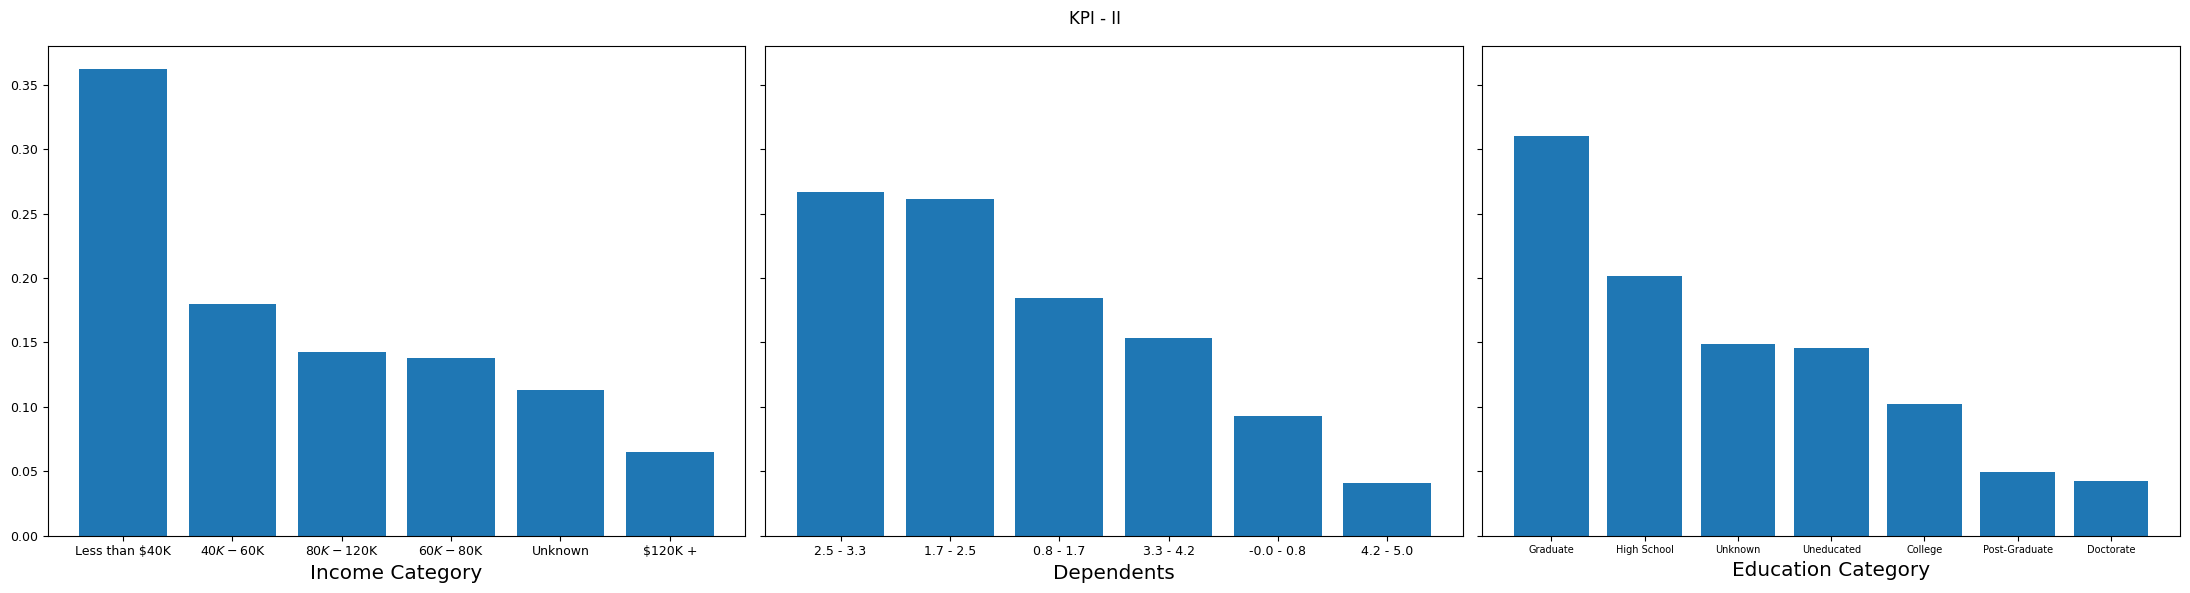

In [13]:
show_bar_chart(2)